# NYC Temprature Dataset #
## final_project_for _AAI_500_dina##
$\bf{date}$: Date in format DD/MM/YYYY. <br>

$\bf{tmax}$: Maximum temperature of the day in °F. <br>

$\bf{tmin}$: Minimum temperature of the day in °F.   <br>

$\bf{tavg}$: Average temperature of the day in °F.    <br>

$\bf{departure}$: Departure from normal temperature in °F.  <br>

$\bf{HDD}$: Heating Degree Days.                    <br>  

$\bf{CDD}$: Cooling Degree Days.                    <br>

$\bf{precipitation}$: Precipitation in inches.      <br>

$\bf{new}$_$\bf{snow}$: New snowfall in inches.            <br> 

$\bf{snow}$_$\bf{depth}$: Snowfall depth in inches.        <br> 


In [233]:
from scipy import stats
import math
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from mpl_toolkits import mplot3d

# 1. Data Importing and Pre-processing:

In [234]:
 # import the csv data as a dataframe
data = pd.read_csv("nyc_temperature.csv")
data_5= data.head()
print(data_5)
print(data_5.dtypes)

     date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0  1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1  2/1/19    41    35  38.0        2.1   27    0             0        0   
2  3/1/19    45    39  42.0        6.3   23    0             T        0   
3  4/1/19    47    37  42.0        6.5   23    0             0        0   
4  5/1/19    47    42  44.5        9.1   20    0          0.45        0   

  snow_depth  
0          0  
1          0  
2          0  
3          0  
4          0  
date              object
tmax               int64
tmin               int64
tavg             float64
departure        float64
HDD                int64
CDD                int64
precipitation     object
new_snow          object
snow_depth        object
dtype: object


In [235]:
# will convert all T values to 0
data['CDD'] = data['CDD'].replace(['T'],'0')
data['precipitation'] = data['precipitation'].replace(['T'],'0')
data['new_snow'] = data['new_snow'].replace(['T'],'0')
data['snow_depth'] = data['snow_depth'].replace(['T'],'0')
print (data)

         date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0      1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1      2/1/19    41    35  38.0        2.1   27    0             0        0   
2      3/1/19    45    39  42.0        6.3   23    0             0        0   
3      4/1/19    47    37  42.0        6.5   23    0             0        0   
4      5/1/19    47    42  44.5        9.1   20    0          0.45        0   
..        ...   ...   ...   ...        ...  ...  ...           ...      ...   
360  27/12/19    54    42  48.0       10.8   17    0             0        0   
361  28/12/19    50    44  47.0       10.0   18    0             0        0   
362  29/12/19    44    38  41.0        4.3   24    0          0.29        0   
363  30/12/19    43    38  40.5        4.0   24    0          0.49        0   
364  31/12/19    46    38  42.0        5.7   23    0          0.01        0   

    snow_depth  
0            0  
1            0  


In [236]:
# convert all values into float
data['tmax'] = data['tmax'].astype(float)
data['tmin'] = data['tmin'].astype(float)
data['tavg'] = data['tavg'].astype(float)
data['departure'] = data['departure'].astype(float)
data['HDD'] = data['HDD'].astype(float)
data['CDD'] = data['CDD'].astype(float)
data['precipitation'] = data['precipitation'].astype(float)
data['new_snow'] = data['new_snow'].astype(float)
data['snow_depth'] = data['snow_depth'].astype(float)
print(data.dtypes)

date              object
tmax             float64
tmin             float64
tavg             float64
departure        float64
HDD              float64
CDD              float64
precipitation    float64
new_snow         float64
snow_depth       float64
dtype: object


# 2. Statistical Analysis and Visualization:

In [237]:
#Now the variables needed for the statistical analysis of the data frame are all numerical
data[["tmax", "tmin", "tavg", "departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]].describe()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,63.169863,49.512329,56.341096,-0.527945,12.463014,4.065753,0.139342,0.042466,0.032877
std,18.806232,17.154853,17.821404,6.421460,13.264920,6.374835,0.321168,0.298309,0.294666
min,16.000000,3.000000,10.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35.000000,41.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,49.000000,56.000000,0.100000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,65.000000,72.000000,3.700000,24.000000,7.000000,0.080000,0.000000,0.000000
max,100.000000,83.000000,91.500000,17.400000,55.000000,27.000000,2.670000,3.800000,4.000000


array([[<AxesSubplot:title={'center':'tmax'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tavg'}>],
       [<AxesSubplot:title={'center':'departure'}>,
        <AxesSubplot:title={'center':'HDD'}>,
        <AxesSubplot:title={'center':'CDD'}>],
       [<AxesSubplot:title={'center':'precipitation'}>,
        <AxesSubplot:title={'center':'new_snow'}>,
        <AxesSubplot:title={'center':'snow_depth'}>]], dtype=object)

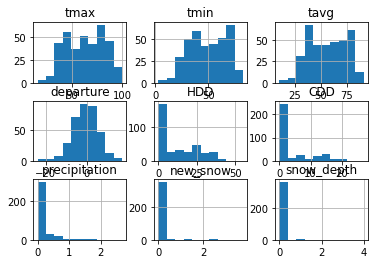

In [238]:
# will calculate and plot histograms for the different variables
data.hist()

In [239]:
# convert the columns in the dataframe to np arrays
# used np.aarray toconvert to array
HDD_array = np.asarray(data["HDD"].to_numpy())

print(HDD_array[1:10])

tmax_array = np.asarray(data["tmax"].to_numpy())
tmax_array=tmax_array.reshape(-1,1)
print(tmax_array[1:10])
tmin_array = np.asarray(data["tmin"].to_numpy())
tmin_array=tmin_array.reshape(-1,1)
tavg_array = np.asarray(data["tavg"].to_numpy())
tavg_array=tavg_array.reshape(-1,1)
departure_array=np.asarray(data["departure"].to_numpy())
departure_array=departure_array.reshape(-1,1)
HDD_array=np.asarray(data["HDD"].to_numpy())
HDD_array=HDD_array.reshape(-1,1)
CDD_array=np.asarray(data["CDD"].to_numpy())
CDD_array=CDD_array.reshape(-1,1)
precipitation_array=np.asarray(data["precipitation"].to_numpy())
precipitation_array=precipitation_array.reshape(-1,1)
new_snow_array=np.asarray(data["new_snow"].to_numpy())
new_snow_array=new_snow_array.reshape(-1,1)
snow_depth_array=np.asarray(data["snow_depth"].to_numpy())
snow_depth_array=snow_depth_array.reshape(-1,1)

[27. 23. 23. 20. 24. 34. 24. 24. 32.]
[[41.]
 [45.]
 [47.]
 [47.]
 [49.]
 [35.]
 [47.]
 [46.]
 [35.]]


Text(0.5, 1.0, 'snow_depth')

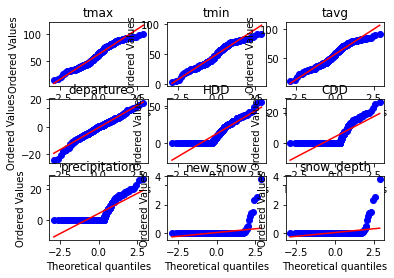

In [240]:
#from scipy import stats
fig= plt.figure()
tmax_plt=fig.add_subplot(3,3,1)
tmax_1d=tmax_array.reshape(365,)
tmax_norm=stats.probplot(tmax_1d,plot=plt)
plt.title("tmax")

tmin_plt=fig.add_subplot(3,3,2)
tmin_1d=tmin_array.reshape(365,)
tmin_norm=stats.probplot(tmin_1d,plot=plt)
plt.title("tmin")

tavg_plt=fig.add_subplot(3,3,3)
tavg_1d=tavg_array.reshape(365,)
tavg_norm=stats.probplot(tavg_1d,plot=plt)
plt.title("tavg")

departure_plt=fig.add_subplot(3,3,4)
departure_1d=departure_array.reshape(365,)
departure_norm=stats.probplot(departure_1d,plot=plt)
plt.title("departure")

HDD_plt=fig.add_subplot(3,3,5)
HDD_1d=HDD_array.reshape(365,)
HDD_norm=stats.probplot(HDD_1d,plot=plt)
plt.title("HDD")

CDD_plt=fig.add_subplot(3,3,6)
CDD_1d=CDD_array.reshape(365,)
CDD_norm=stats.probplot(CDD_1d,plot=plt)
plt.title("CDD")

precipitation_plt=fig.add_subplot(3,3,7)
precipitation_1d=CDD_array.reshape(365,)
precipitation_norm=stats.probplot(precipitation_1d,plot=plt)
plt.title("precipitation")

new_snow_plt=fig.add_subplot(3,3,8)
new_snow_1d=new_snow_array.reshape(365,)
new_snow_norm=stats.probplot(new_snow_1d,plot=plt)
plt.title("new_snow")

snow_depth_plt=fig.add_subplot(3,3,9)
snow_depth_1d=new_snow_array.reshape(365,)
snow_depth_norm=stats.probplot(snow_depth_1d,plot=plt)
plt.title("snow_depth")

 Based on the plotted histograms the departure seems like the best normally distributed variable <br>
 the snow_depth and new_snow seem to be the least normally distributed       <br>
 this can be due to a few number of days of snow meaning few samples        <br>
 However, according to the normal probability plots above tmax,tmin, tavg and departure seem to be a Gaussian distribution <br>

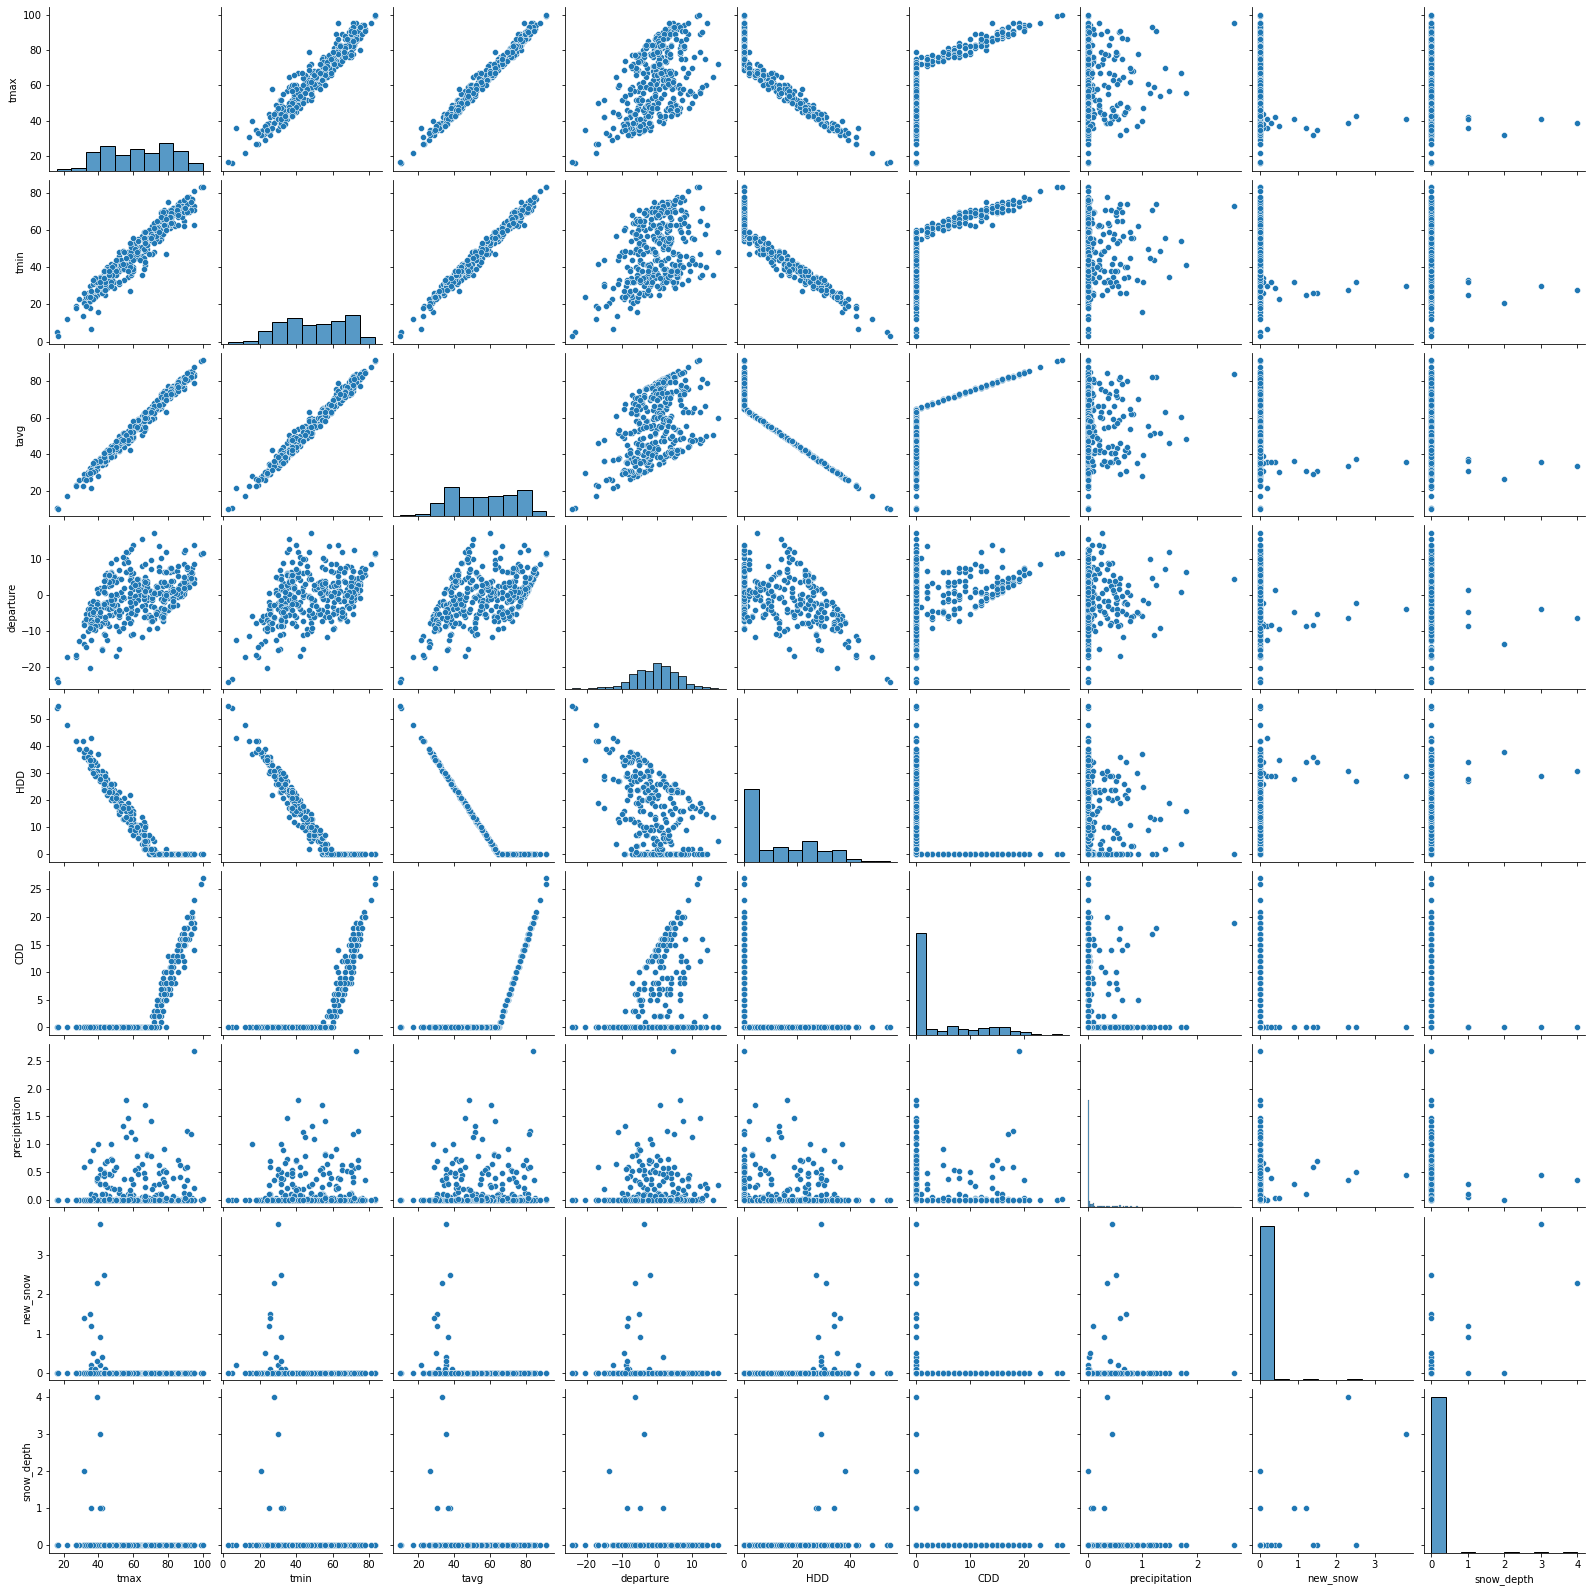

In [241]:
# Visulaize the relationship between the columns
sns.pairplot(data)

Based on the visualizations above, it looks like HDD has negative correlation with tmin, tmax, and taverage <br>
we can confirm this visual correlaion by calculating the correlation coeffients <br>
Other examples that show strong correlation are the following:(tmax, taverage), (tmax,tmin), (tmin, taverage) <br>
Examples that show no good correlations are the following:(precipitation, tmax), (precipitation, HDD), (tmin, precipitation)

In [242]:
# calculate correlation between the columns
data.corr()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tmax,1.000000,0.964680,0.991930,0.504420,-0.948704,0.801030,0.008210,-0.183409,-0.146762
tmin,0.964680,1.000000,0.990294,0.433581,-0.951052,0.792244,0.015270,-0.174763,-0.141384
tavg,0.991930,0.990294,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.504420,0.433581,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.948704,-0.951052,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.801030,0.792244,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.008210,0.015270,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.183409,-0.174763,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.146762,-0.141384,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


The correlation between HDD and tmax= -0.948 <br>
The correlation between HDD and tmin= -0.951 <br>
The correlation between HDD and taverage= -0.958 <br>

# 3. Regression Model

Based on the correlation table above we will develop a regression model to predict HDD from tmax, tmin and taverage <br>
will develop four regression models: <br>
(HDD a function of tmax) <br>
(HDD a function of tmin)  <br>
(HDD a function of taverage) <br>
(HDD a function of both tmax and tmin) <br>
for each one of these regression models will calculate the mean square error (MSE) and will choose the model with the least value of MSE <br>

In [243]:
# first regression model_1 of HDD as a function of tmax
model_1=LinearRegression().fit(tmax_array, HDD_array )
print(model_1)
b_0=model_1.intercept_
print("b_0=", model_1.intercept_)
b_1=model_1.coef_
print("b_1=", model_1.coef_)

LinearRegression()
b_0= [54.73412354]
b_1= [[-0.66916577]]


In [264]:
#find Y_hat
Y_hat=b_0+b_1*tmax_array
#print("Y_hat=", Y_hat)
Y_hat=Y_hat.reshape(-1,1)

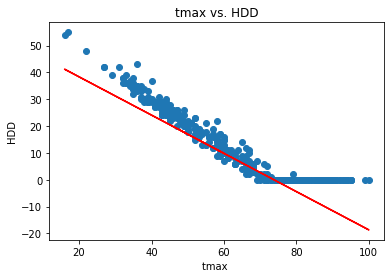

In [265]:
#fit a regression line of model_1 to the scatter plot of tmax vs HDD

plt.scatter(tmax_array, HDD_array)
plt.title("tmax vs. HDD")
plt.xlabel("tmax ")
plt.ylabel("HDD")
plt.plot(tmax_array, Y_hat, color='red')
plt.show()

In [266]:
# Calculate MSE=SSE/(n-2) for the regression model_1
#first calculate SSE
n=365
E_1=(HDD_array-Y_hat)**2
#print(E_1)
#print(E_1.shape)
SSE_1=np.sum(E_1)
print("SSE_1=", SSE_1)
MSE_1=SSE_1/(n-2)
print("MSE_tmax_HDD=", MSE_1)

SSE_1= 15312.84494323118
MSE_tmax_HDD= 42.18414584912171


In [255]:
# second regression model_2 of HDD as a function of tmin
model_2=LinearRegression().fit(tmin_array, HDD_array )
print(model_2)
b_0=model_2.intercept_
print("b_0=", model_2.intercept_)
b_1=model_2.coef_
print("b_1=", model_2.coef_)

LinearRegression()
b_0= [48.87422179]
b_1= [[-0.7353968]]


In [273]:
#find Y_hat
Y_hat=b_0+b_1*tmin_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

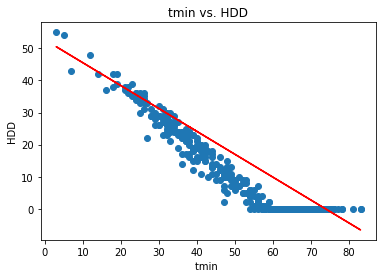

In [274]:
#fit a regression line of model_2 to the scatter plot of tmin vs HDD

plt.scatter(tmin_array, HDD_array)
plt.title("tmin vs. HDD")
plt.xlabel("tmin ")
plt.ylabel("HDD")
plt.plot(tmin_array, Y_hat, color='red')
plt.show()

In [275]:
# Calculate MSE=SSE/(n-2) for the regression model_2
#first calculate SSE
E_2=(HDD_array-Y_hat)**2
SSE_2=np.sum(E_2)
MSE_2=SSE_2/(n-2)
print("MSE_tmin_HDD=", MSE_2)

MSE_tmin_HDD= 40.85100081464316


In [259]:
# third regression model_3 of HDD as a function of tavg
model_3=LinearRegression().fit(tavg_array, HDD_array )
print(model_3)
b_0=model_3.intercept_
print("b_0=", model_3.intercept_)
b_1=model_3.coef_
print("b_1=", model_3.coef_)

LinearRegression()
b_0= [52.65061535]
b_1= [[-0.71329109]]


In [276]:
#find Y_hat
Y_hat=b_0+b_1*tavg_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

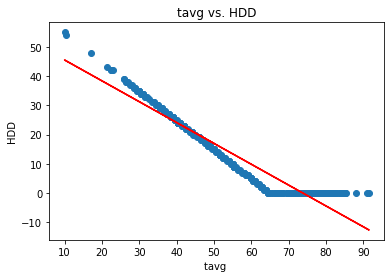

In [277]:
#fit a regression line of model_3 to the scatter plot of tavg vs HDD

plt.scatter(tavg_array, HDD_array)
plt.title("tavg vs. HDD")
plt.xlabel("tavg ")
plt.ylabel("HDD")
plt.plot(tavg_array, Y_hat, color='red')
plt.show()

In [133]:
# Calculate MSE=SSE/(n-2) for the regression model_3
#first calculate SSE
Y_hat=Y_hat.reshape(1,-1)
E_3=(HDD_array-Y_hat)**2
SSE_3=np.sum(E_3)
MSE_3=SSE_3/(n-2)
print("MSE_tavg_HDD=", MSE_3)

MSE_tavg_HDD= 42.18414584912171


In [225]:
# last regression model_4 is a multilinear model of HDD as a function of (tmax and tmin)
tmax_min=np.concatenate((tmax_array, tmin_array), axis=1)
#print(tmax_min.shape)
model_4=LinearRegression().fit(tmax_min, HDD_array )
print(model_4)
b_0=model_4.intercept_
print("b_0=", model_4.intercept_)
b_1=model_4.coef_
print("b_1=", model_4.coef_)

LinearRegression()
b_0= [52.30678213]
b_1= [[-0.31758083 -0.39954151]]


In [226]:
#find Y_hat
Y_hat=b_0+b_1[0,0]*tmax_array+b_1[0,1]*tmin_array
#print("Y_hat_=", Y_hat)

C:\Users\dinas\AppData\Local\Temp\ipykernel_19816\1425713347.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



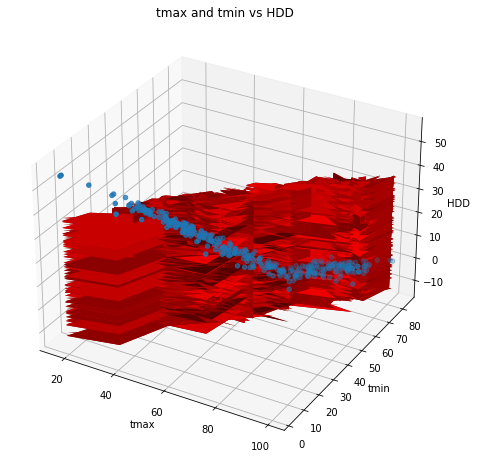

In [294]:
#fit a regression line of model_4 to the scatter plot of tmax_min vs HDD
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection="3d")
ax.scatter(tmax_array.reshape(365,),tmin_array.reshape(365,), HDD_array.reshape(365,))
ax.set_xlabel("tmax")
ax.set_ylabel("tmin")
ax.set_zlabel("HDD")
ax.set_title("tmax and tmin vs HDD")
ax.plot_surface(tmax_array.reshape(365,),tmin_array.reshape(365,), Y_hat.reshape(365,1),color="red")

fig.show()

In [227]:
# Calculate MSE=SSE/(n-2) for the regression model_4
#first calculate SSE
E_4=(HDD_array-Y_hat)**2
SSE_4=np.sum(E_4)
MSE_4=SSE_4/(n-2)
print("MSE_tmax_tmin=", MSE_4)

MSE_tmax_tmin= 14.3682986973997


# Comparison of the four regession models
we calculated the mean square errors for the four models and compared them <br>
$\bf{Model 4}$ which is the multiple regression model of HDD as a function of both tmax and tmin, has the least mean square error MSE of 14.36829 compared to the other three models which have an MSE above 40<br>
Therefore this model results in the best predictions <br>
Next we will evaluate the assumptions of the regression model: linearity and normal distribution <br>

((array([-2.89476187, -2.60416026, -2.44008156, -2.32339534, -2.23174377,
         -2.15571559, -2.09042256, -2.032987  , -1.98156619, -1.93490632,
         -1.89211417, -1.85253003, -1.81565229, -1.78109027, -1.74853354,
         -1.71773117, -1.68847732, -1.66060095, -1.63395835, -1.60842754,
         -1.58390407, -1.56029777, -1.53753027, -1.51553298, -1.4942455 ,
         -1.4736144 , -1.45359213, -1.4341362 , -1.41520849, -1.39677463,
         -1.37880355, -1.36126705, -1.34413948, -1.32739738, -1.3110193 ,
         -1.29498553, -1.27927793, -1.26387978, -1.24877561, -1.23395108,
         -1.21939287, -1.20508862, -1.19102679, -1.1771966 , -1.16358798,
         -1.15019151, -1.13699834, -1.12400016, -1.11118916, -1.09855798,
         -1.08609968, -1.07380771, -1.06167589, -1.04969834, -1.03786952,
         -1.02618416, -1.01463728, -1.00322411, -0.99194016, -0.98078111,
         -0.96974287, -0.95882155, -0.9480134 , -0.93731488, -0.92672259,
         -0.91623326, -0.90584378, -0.

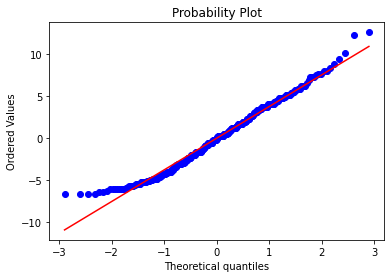

In [297]:
#testing the normality assumption for the residuals
residuals=HDD_array-Y_hat
stats.probplot(residuals.reshape(365,),plot=plt)

In [298]:
# the results show that the residuals are almost normally distributed

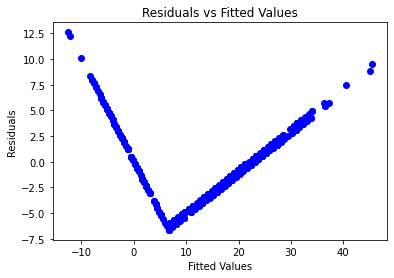

In [301]:
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.scatter(Y_hat, residuals,color='blue')


Since the residuals have higher values for low and high fitted values, and smaller values in the middle <br>
therefore a linear model doesnt seem the best fit <br>